## TextSlider + SD1

In [ ]:
import torch
from pipeline_stable_diffusion import StableDiffusionPipeline
import matplotlib.pyplot as plt

/scratch3/users/nickchiu/.miniconda/envs/textslider/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda"

# choose any personalized DM checkpoints you want
ckpt_name = "SG161222/Realistic_Vision_V5.1_noVAE"

pipe = StableDiffusionPipeline.from_pretrained(ckpt_name, torch_dtype=torch.bfloat16)
_ = pipe.to(device)

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  8.47it/s]


### Determine the attribute, input prompt, slider scales

In [3]:
attribute = "makeup"

# load the clip lora
lora_path = f"models/{attribute}slider_rank4/clip_lora"
pipe.load_lora_weights(lora_path, adapter_name="slider")

No LoRA keys associated to UNet2DConditionModel found with the prefix='unet'. This is safe to ignore if LoRA state dict didn't originally have any UNet2DConditionModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


In [4]:
prompt = "image of a person, photorealistic"

# slider scale (typically 0 ~ 0.3 have better results)
scales = torch.linspace(0, 0.4, 5)
start_noise = 800
seed = 666

### Generating ...

100%|██████████| 50/50 [00:04<00:00, 10.79it/s]


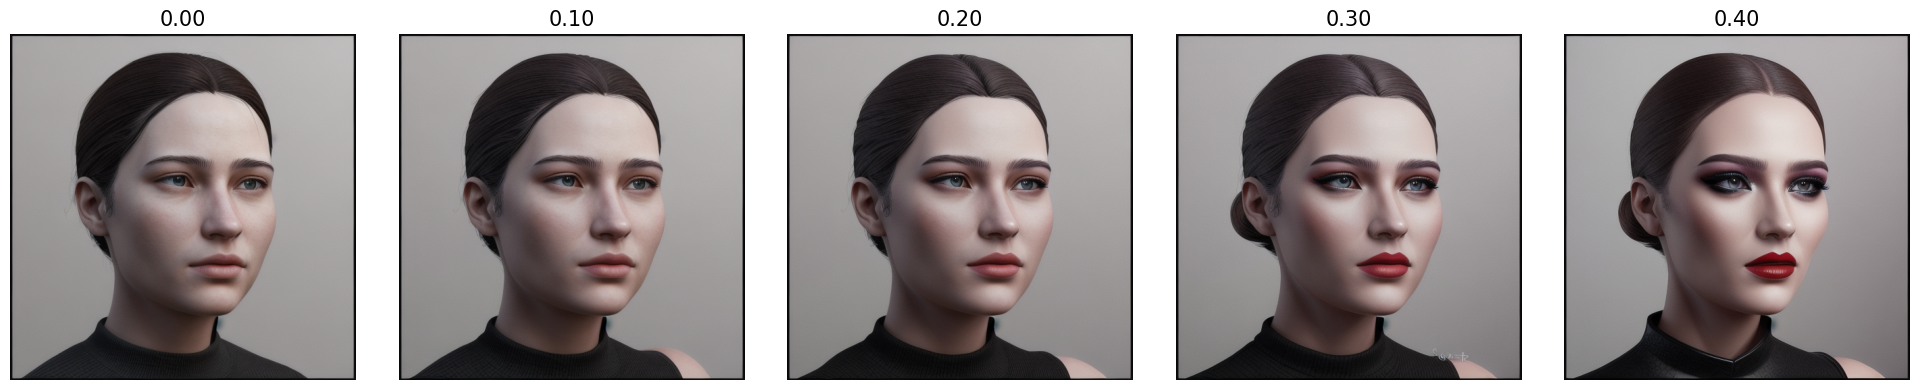

In [5]:
images_list = []
for s in scales:
    im = pipe(
            prompt=prompt,
            generator=torch.manual_seed(seed),
            guidance_scale=7.5,
            num_inference_steps=50, 
            start_noise=start_noise,
            scale=s,
        ).images[0]
    images_list.append(im)


fig, ax = plt.subplots(1, len(images_list), figsize=(20,4))
for i, a in enumerate(ax):
    a.imshow(images_list[i])
    a.set_title(f"{scales[i]:.2f}",fontsize=15)
    a.axis('off')
    plt.tight_layout()
plt.show()